### 利用数组进行数据处理
 Numpy数组可以将许多的数据处理任务表述为数组表达式（否则将需要进行编写循环），用数组表达式代替循环的做法通常叫作矢量化。一般来说，矢量化数组运算要比等价的纯Python实现快上一两个数量级。
 例如想要在一组值（网格型）上计算sqrt(x^2+y^2),可通过以下矢量运算来实现：

In [1]:
import numpy as np

In [2]:
points = np.arange(-5,5,0.01)

In [3]:
x,y = np.meshgrid(points,points)

In [4]:
y

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [5]:
z = np.sqrt(x**2 + y**2)

In [6]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

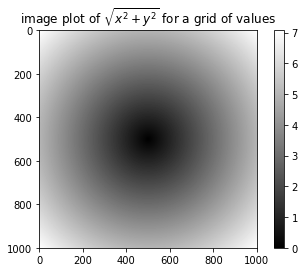

In [8]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar();plt.title("image plot of $\sqrt{x^2+y^2}$ for a grid of values")

#### 数学和统计方法
Numpy提供了一组数学函数来对整个数组或者某个轴向的数据进行统计计算。sum、mean以及std等`聚合计算`既可以做为数组的实例方法调用，也可以当做顶级Numpy函数使用，如下：

In [9]:
arr = np.random.randn(6,4)

In [10]:
arr

array([[ 0.44916336,  0.80800342, -1.4872726 ,  0.66605592],
       [-0.34974145,  0.47742617, -0.05005747, -2.08935022],
       [ 2.01927714, -0.48954114, -1.39303456, -0.80178908],
       [-3.01691984,  0.22624882,  0.72552368,  0.83517007],
       [-0.20150661, -0.14880471, -0.01319879, -2.44221394],
       [ 2.09845749, -0.06163791, -0.76895614, -0.7726458 ]])

In [11]:
arr.mean()

-0.24088934105166915

In [12]:
np.mean(arr)

-0.24088934105166915

In [13]:
arr.sum()

-5.7813441852400596

同时，mean和sum这类函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组：

In [14]:
arr.mean(0)

array([ 0.16645502,  0.13528244, -0.49783265, -0.76746217])

In [16]:
arr.sum(0)

array([ 0.99873009,  0.81169465, -2.98699588, -4.60477305])

`累加函数`返回的则是同样大小的数组，但会根据每个低维的切片沿着标记轴计算部分聚类：

In [17]:
arr.cumsum()

array([ 0.44916336,  1.25716678, -0.23010583,  0.43595009,  0.08620865,
        0.56363482,  0.51357735, -1.57577287,  0.44350427, -0.04603687,
       -1.43907143, -2.24086051, -5.25778035, -5.03153153, -4.30600785,
       -3.47083778, -3.67234439, -3.8211491 , -3.83434789, -6.27656183,
       -4.17810434, -4.23974225, -5.00869839, -5.78134419])

In [18]:
arr.cumsum(axis=0)

array([[ 0.44916336,  0.80800342, -1.4872726 ,  0.66605592],
       [ 0.09942192,  1.28542959, -1.53733008, -1.4232943 ],
       [ 2.11869905,  0.79588845, -2.93036463, -2.22508338],
       [-0.89822079,  1.02213727, -2.20484095, -1.38991331],
       [-1.0997274 ,  0.87333256, -2.21803974, -3.83212725],
       [ 0.99873009,  0.81169465, -2.98699588, -4.60477305]])

In [19]:
arr.cumprod(axis=1)

array([[ 4.49163363e-01,  3.62925531e-01, -5.39769200e-01,
        -3.59516470e-01],
       [-3.49741447e-01, -1.66975720e-01,  8.35838228e-03,
        -1.74635878e-02],
       [ 2.01927714e+00, -9.88519229e-01,  1.37704145e+00,
        -1.10409680e+00],
       [-3.01691984e+00, -6.82574556e-01, -4.95224006e-01,
        -4.13596267e-01],
       [-2.01506609e-01,  2.99851334e-02, -3.95767453e-04,
         9.66548789e-04],
       [ 2.09845749e+00, -1.29344531e-01,  9.94602715e-02,
        -7.68475609e-02]])

下面列出了全部的基本数组统计方法：
![](images/15777037-93f5fd51c59940c6.png)
![](images/15777037-9193661a1ae65d88.png)
#### 布尔型数组的方法(any,all)
布尔值会被强制转换为1(True)和0(False)。因此，sum经常被用来对布尔型数组中的True值计数：

In [20]:
(arr>0).sum()

9

同时，数组还有两个方法`any`和`all`，它们对布尔型数组非常有用。any用于测试数组中是否存在True，而all则检查数组中所有值是否都是True，这两个方法也能用于非布尔数组，所有非0元素将会被当做True
#### Numpy中的sort方法
Numpy中也有`sort`方法来就地排序：

In [21]:
arr

array([[ 0.44916336,  0.80800342, -1.4872726 ,  0.66605592],
       [-0.34974145,  0.47742617, -0.05005747, -2.08935022],
       [ 2.01927714, -0.48954114, -1.39303456, -0.80178908],
       [-3.01691984,  0.22624882,  0.72552368,  0.83517007],
       [-0.20150661, -0.14880471, -0.01319879, -2.44221394],
       [ 2.09845749, -0.06163791, -0.76895614, -0.7726458 ]])

In [22]:
arr.sort()

In [23]:
arr

array([[-1.4872726 ,  0.44916336,  0.66605592,  0.80800342],
       [-2.08935022, -0.34974145, -0.05005747,  0.47742617],
       [-1.39303456, -0.80178908, -0.48954114,  2.01927714],
       [-3.01691984,  0.22624882,  0.72552368,  0.83517007],
       [-2.44221394, -0.20150661, -0.14880471, -0.01319879],
       [-0.7726458 , -0.76895614, -0.06163791,  2.09845749]])

同时，它也支持轴向参数，来对特定轴向进行排序

In [24]:
arr.sort(0)

In [25]:
arr

array([[-3.01691984, -0.80178908, -0.48954114, -0.01319879],
       [-2.44221394, -0.76895614, -0.14880471,  0.47742617],
       [-2.08935022, -0.34974145, -0.06163791,  0.80800342],
       [-1.4872726 , -0.20150661, -0.05005747,  0.83517007],
       [-1.39303456,  0.22624882,  0.66605592,  2.01927714],
       [-0.7726458 ,  0.44916336,  0.72552368,  2.09845749]])

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身，计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值：

In [26]:
large_arr = np.random.randn(100)

In [27]:
large_arr.sort()

In [28]:
large_arr[int(0.05*len(large_arr))]

-1.7964584618606823

#### 针对一维ndarray其他的集合逻辑（unique、in1d等）
Numpy提供了一些针对`一维ndarray`的基本集合运算。最常用的要数np.unique了，它可以找出数组中唯一值并返回已排序的结果：v#

In [29]:
names = np.array(['zhao','zhao','li','hu','yang','hu'])

In [30]:
np.unique(names)

array(['hu', 'li', 'yang', 'zhao'], dtype='<U4')

与上述代码等价的python代码：

In [31]:
sorted(set(names))

['hu', 'li', 'yang', 'zhao']

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [32]:
np.in1d(names, ['zhao','hu'])

array([ True,  True, False,  True, False,  True])

Numpy中的集合函数如下表：
![](images/15777037-6c355ede5c96372c.png)